<center><img src="https://i.imgur.com/YNtjmbq.png" width="800"></center> 

# Práctica 2 – Cálculos sobre la RED


<img align="right" width="500" height="100" src="https://i.imgur.com/vxZjEn1.png">

Para trabajar con grafos (redes) hay una serie de programas que podemos utilizar. La gran diferencia radica en el tamaño del archivo que pueden manejar (complejidad de la red), en el costo del programa, la cantidad y actualización de funciones (algoritmos) implementados, y en si requieren o no programación.



## **ESTRUCTURA DE DATOS**

Veamos la imagen de un grafo en [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

De aquí notamos dos componentes básicos: los nodos (_vertex_) y los enlaces (_edges_). Los enlaces mostrados no tienen direccionalidad (flechas), pero pueden tenerla cuando queremos tener un grafo dirigido. Las redes son grafos, pero es una palabra más familiar que usaremos en nuestras sesiones.

Como podemos tener una gran cantidad de nodos y enlaces, hay que saber elegir la estructura y la herramienta apropiada para crear una red. Por ejemplo, en esta hoja de calculo podemos ver los datos que utilizó Adolfo Figueroa en su artículo "_Competition and circulation of economic elites: Theory and application to the case of Peru_" del 2007, en dos formatos, la matriz de adyacencia (**adjancency matrix**) y la lista de enlaces (**edgelist**):

In [2]:
%%html
<iframe src="https://docs.google.com/spreadsheets/d/e/2PACX-1vReqFHgPvGpZiSozcooJkZOH7kOCvtpgtq0fvuIehQ6MfqM-To93umwRY0pJBZzoCetj_ptmLCpNnGv/pubhtml?widget=true&amp;headers=false" width="900" height="500"></iframe>

Ambos formatos son válidos, pero el edgelist, aun siendo más eficiente, suele no mostrar los nodos de la población bajo estudio que no tiene relaciones (_isolates_); por lo que usaremos en esta sesión la matriz de adyacencia.

# LECTURA DE DATOS

## Usando NETWORKX

_Networkx_ es una librería de Python, un poderoso lenguaje de programación usado por cientistas de datos. Por ello podría instalar Python primero en su computadora (se recomienda [ANACONDA](https://www.anaconda.com/download)). Ello no es necesario si desea usar la versión de Python que ofrece GOOGLE, [Colab](https://colab.research.google.com/).

Si ya está en COLAB, preparese para leer los datos. La tabla antes mostrada, ya almacenada en Google Drive, puede ser utilizada directamente en Python (sea Anaconda o Colab) si contamos con el link:

* Paso 1: _Compartir_ y _Publicar_ tabla en la web:
  
<img src="https://i.imgur.com/oYjaJR1.jpg" width="300"/>

* Paso 2: Obtener el link

<img src="https://i.imgur.com/TAaNxlo.jpg" width="300"/>

La <ins>primera vez</ins> que haga el paso 2, debe presionar la opción "_Publicar_" (aqui ya aparece como _"Publicado"_)

A continuación, si está usando Python, puede guardar el link en Python de manera sencilla:

In [3]:
# link a google sheets entre "comillas" 
LinkToGoogle="https://docs.google.com/spreadsheets/d/e/2PACX-1vReqFHgPvGpZiSozcooJkZOH7kOCvtpgtq0fvuIehQ6MfqM-To93umwRY0pJBZzoCetj_ptmLCpNnGv/pub?output=xlsx"


Leamos la matriz de adyacencia, para lo cual primero leemos la tabla usando el link en con la libreria _pandas_:

In [4]:
# leyendo matriz de adyacencia

import pandas as pd

adjacency=pd.read_excel(LinkToGoogle, # link a la tabla
                        index_col=0,  # la columna '0' guarda los nombres
                        sheet_name='adjacency') # la tabla tiene este nombre

El objeto **adjancency** guarda la tabla. Ahora se activa la librería **networkx**, y se crea la red:

In [5]:
# activar networkx 
import networkx as nx

# crear red
eliteFromAdjacency=nx.from_pandas_adjacency(adjacency)

La red ya está creada, veamos:

In [6]:
# nodos de la red
eliteFromAdjacency.nodes(data=True)

NodeDataView({'Romero': {}, 'Graña': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodríguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

In [7]:
# enlaces de la red
eliteFromAdjacency.edges(data=True)

EdgeDataView([('Romero', 'Graña', {'weight': 1}), ('Romero', 'Miro Quesada', {'weight': 1}), ('Romero', 'Moreyra', {'weight': 1}), ('Romero', 'Fort', {'weight': 1}), ('Romero', 'De La Puente', {'weight': 1}), ('Romero', 'Onrubia', {'weight': 1}), ('Romero', 'Brescia', {'weight': 1}), ('Romero', 'Nicolini', {'weight': 1}), ('Romero', 'Bentin', {'weight': 1}), ('Romero', 'Benavides', {'weight': 1}), ('Romero', 'Bustamante', {'weight': 1}), ('Romero', 'Woodman Pollit', {'weight': 1}), ('Romero', 'Raffo', {'weight': 1}), ('Romero', 'Piazza', {'weight': 1}), ('Romero', 'Berckemeyer', {'weight': 1}), ('Romero', 'Llosa Barber', {'weight': 1}), ('Romero', 'Rizo Patron', {'weight': 1}), ('Romero', 'Montori', {'weight': 1}), ('Graña', 'Miro Quesada', {'weight': 1}), ('Graña', 'Fort', {'weight': 1}), ('Graña', 'De La Puente', {'weight': 1}), ('Graña', 'Wiese', {'weight': 1}), ('Graña', 'Montero', {'weight': 1}), ('Graña', 'Benavides', {'weight': 1}), ('Graña', 'Bustamante', {'weight': 1}), ('Grañ

Si quisieramos usar el _edgelist_, podríamos necesitaríamos:

In [8]:
edgeList=pd.read_excel(LinkToGoogle,
                        sheet_name='edgelist') # la tabla tiene este nombre

edgeList
# crear red
eliteFromEdgelist=nx.from_pandas_edgelist(edgeList,edge_attr=True)

Veamos la diferencia:

* Cantidad de Nodos:

In [9]:
# 'len()' se usa para contar elementos
len(eliteFromAdjacency.nodes()), len(eliteFromEdgelist.nodes())

(37, 31)

* Cantidad de enlaces:

In [10]:
len(eliteFromAdjacency.edges()), len(eliteFromEdgelist.edges())

(135, 135)

* Las islas del _edgelist_:

In [11]:
list(nx.isolates(eliteFromEdgelist))

[]

* Las islas del _adjacency_:

In [12]:
list(nx.isolates(eliteFromAdjacency))

['Lucioni',
 'Rodriguez Rodríguez',
 'Custer',
 'Ikeda',
 'Cogorno',
 'Arias Davila']

### Exportación

Las redes creadas con Networkx pueden exportarse en diferentes formatos, que serán útiles en otros programas. Aquí grabaremos en el formato GML y GRAPHML:

In [13]:
import os # para usar funciones de directorio

filename1=os.path.join('data','eliteFromAdjacency.gml') # nombre incluye 'donde'
filename2=os.path.join('data','eliteFromAdjacency.graphml') 

# guardando:
nx.write_gml(eliteFromAdjacency,filename2)

nx.write_graphml(eliteFromAdjacency,filename2)


## Usando UCINET


UCINET es un software de análisis de redes sociales desarrollado por Steve Borgatti, Martin Everett y Linton Freeman. El nombre "UCINET" proviene de "University of California at Irvine NETwork".  Para poder empezar, necesitas tener UCINET instalado en tu computadora. Puedes descargarlo desde el sitio web oficial de [UCINET](https://sites.google.com/site/ucinetsoftware/download?authuser=0) y seguir las instrucciones para la instalación. Recuerda que UCINET sólo funciona en Windows, y es un software de pago (puede usarlo sin pagar por tres meses).

Si ya instaló UCINET, ejecútelo y verá esta pantalla:

<img src="https://i.imgur.com/GVyrPUl.png" width="900"/>


Para importar una tabla debemos leer el archivo en Excel, en este caso debes descargar el archivo de Google como Excel. Para ello puedes ir a este [enlace](https://drive.google.com/drive/folders/1QXy0RwgNUBryirnVx0-_-rfr3WZxSld5?usp=sharing). 

Aquí descargaremos esa tabla en formato CSV (comma-separated values), y la pondremos en una carpeta llamada **data**:

<img src="https://i.imgur.com/VrcvBYI.jpg" width="900"/>



Para que UCINET lea esa tabla, iremos a _matrix editor_, tercer ícono de la izquierda, como se ve aquí:

<img src="https://i.imgur.com/wzaH7a0.jpg" width="900"/>

Al pulsar ese icono se abrirá una ventana, seleccione la opción de abrir archivo: 



<img src="https://i.imgur.com/PtaFMPK.jpg" width="400"/>


Inmediatamente, se cargará la matriz, y la verá así:


<img src="https://i.imgur.com/C6B2Ntt.png" width="400"/>

Finalmente, grabe la matriz en el formato propio de UCINET (.##h):


<img src="https://i.imgur.com/HNoF09h.png" width="400"/>


Para verificar que UCINET ya tiene bien grabado este archivo, puede abrirlo con la opción **Display** del menú _Data_:


<img src="https://i.imgur.com/D9yxaA1.png" width="400"/>


Luego de presionar _Display_, presione el recuadro con los puntos suspensivos y elija el archivo que se ha creado:

<img src="https://i.imgur.com/DgYQG0u.png" width="400"/>

De ahí, verá que ya UCINET reconoce esos datos:

<img src="https://i.imgur.com/MupDVxl.png" width="400"/>

<div class="alert-success">

## Ejercicio 1

Le toca abrir el edgelist desde **UCINET**.

    
Para ello, NO use el _matrix editor_ sino el **_DL Editor_**, cuyo ícono está al costado del primero.

<img src="https://i.imgur.com/f8xJaXt.png" width="400"/>

Una vez dentro del **_DL Editor_**, abra el archivo en Excel, seleccionando la hoja respectiva: **edgelist**.

<img src="https://i.imgur.com/0wJuk7r.png" width="400"/>


Se verá la tabla como edgelist. Ahora grábelo como archivo de UCINET. Para ello, debe decidir:

1. Qué **formato** debe asignarse

<img src="https://i.imgur.com/yaiOm6Y.png" width="400"/>

2. Qué opcion(es) seleccionar
   
<img src="https://i.imgur.com/AwHjtzq.png" width="400"/>

Como antes, use la función **'Display'**. **Si el resultado no coincide con el de Networkx, vuelva a intentarlo**.


</div>


<div class="alert-success">

## Ejercicio 2

Use el archivo **GML** creado por Networkx. Para ello siga esta ruta:


<img src="https://i.imgur.com/woIP2Se.png" width="400"/>

**¿Qué resultado obtiene?**

</div>

# VISUALIZACION DE REDES

Es muy común producir gráficos de redes. La gráficas, si son bien hechas, pueden resaltar algunas propiedades de la red. No siempre es posible lograrlo cuando la red es muy grande y no muestra una estructura clara.

## Usando NETWORKX

Tenemos activa la red _eliteFromAdjacency_. Visualizarla con Networkx es muy sencillo:


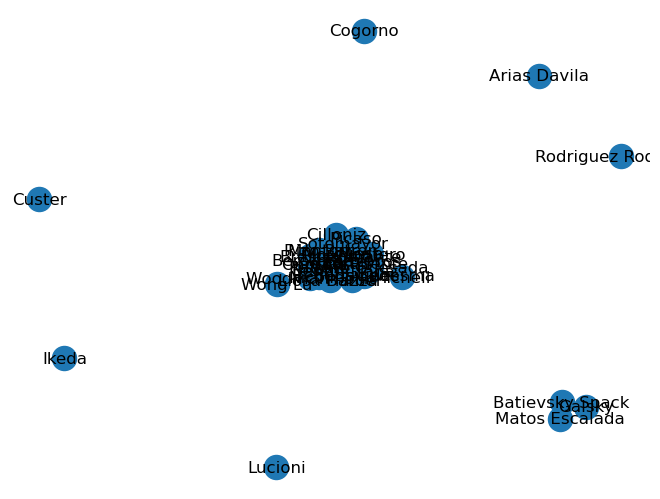

In [26]:
nx.draw(eliteFromAdjacency,with_labels=True)

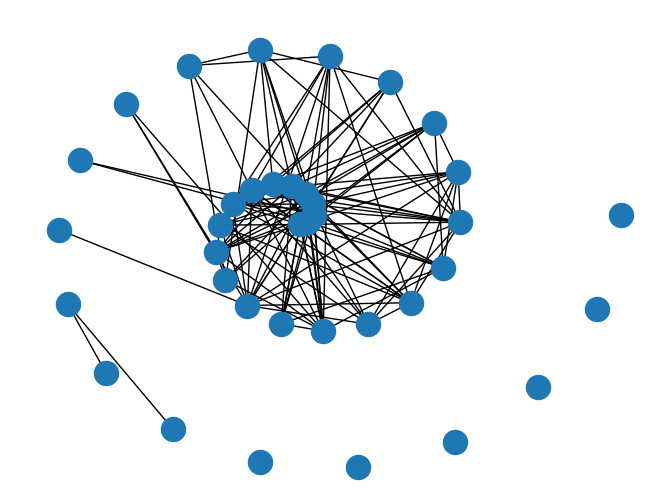

In [27]:
pos = nx.spiral_layout(eliteFromAdjacency)
nx.draw(eliteFromAdjacency, pos=pos)

Hay muchos _layouts_ disponibles, los de Networkx puedes revisarlos [aquí](https://networkx.org/documentation/stable/reference/drawing.html#).

Hay dos buenas librería para visualizar esta red en Python:
* netwulf
* ipysigma

Puedes instalarlas para ver estos ejemplos:

In [31]:
# pip install netwulf ipysigma

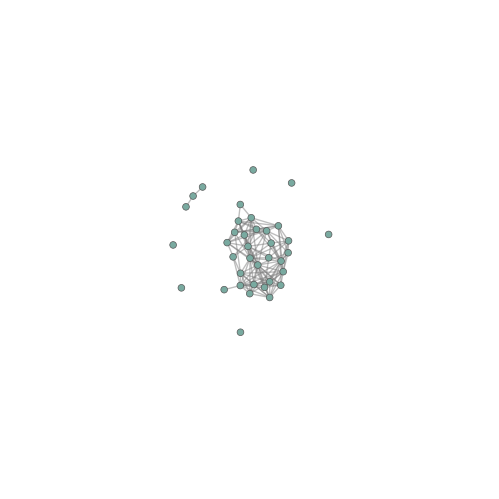

In [30]:
from netwulf import visualize

visualize(eliteFromAdjacency);

In [32]:
from ipysigma import Sigma

Sigma(eliteFromAdjacency)

Sigma(nx.Graph with 37 nodes and 135 edges)

## Usando UCINET

UCINET usa el programa NetDraw para gráficar. NetwDraw se instala cuando instalas UCINET.

Si deseamos abrir la red de adyacencia creada en UCINET, damos 3 pasos:

1. Activamos Netdraw usando su link.
2. En NetDraw, abrimos los archivos de red, usando la carpeta con la letra 'U'.
3. Ubicamos el archivo y lo abrimos.

Veamos esos tres pasos en esta gráfica:

<img src="https://i.imgur.com/HwxNf3J.png" width="900"/>

La gráfica obtenida debe ser similar a esta:


<img src="https://i.imgur.com/GEWRRW1.png" width="900"/>



## Usando GEPHI

Gephi es un software de visualización y exploración de redes, de código abierto y gratuito. El Gephi debe instalarse en la computadora directamente desde su [página web](https://gephi.org/users/download/). 

Hasta aquí tenemos varios archivos:

* Un excel con la matriz de adyacencia.
* Un GML con la matriz de adyacencia.
* Un GRAPHML con la matriz de adyacencia.
* Un UCINET (##h / ##d) con la matriz de adyacencia.


Usemos el GRAPHML, obteniendo esto:

<img src="https://i.imgur.com/NOqc2WE.png" width="900"/>

<div class="alert-success">

## Ejercicio 3

Abra los demás archivos disponibles, menos los de UCINET.

**¿Qué resultado obtiene?**

</div>